In [8]:
import pandas as pd
d = {'one': pd.Series([1,2,3], index = ['a','b','c']),
     'two': pd.Series([1,2,4], index = ['a','b','c']),
     'three': pd.Series([10,20,30,40], index = ['a','b','c','d'])}
df = pd.DataFrame(d)
df

,one,two,three
a,1.0,1.0,10
b,2.0,2.0,20
c,3.0,4.0,30
d,NaN,NaN,40


In [9]:
#Adding new Column
df['four'] = pd.Series([10,20,30], index = ['d', 'b', 'c'])
df

,one,two,three,four
a,1.0,1.0,10,NaN
b,2.0,2.0,20,20.0
c,3.0,4.0,30,30.0
d,NaN,NaN,40,10.0


In [10]:
import pandas as pd
df = pd.DataFrame([[1,2], [3,4]], columns = ['a','b'])
df2 = pd.DataFrame([[5,6], [7,8]], columns = ['a','b'])
df1 = pd.concat([df, df2])
df1

,a,b
0,1,2
1,3,4
0,5,6
1,7,8


# Dealing with outliners

In [11]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25,30,22,27,200],
    'Salary': [50000, 60000, 45000, 52000, 900000]
}
df= pd.DataFrame(data)
print("Original DataFrame:")
df

Original DataFrame:


,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,22,45000
3,David,27,52000
4,Eve,200,900000


### Finding Outliers

In [12]:
Q1 = df[['Age', 'Salary']].quantile(0.25)
Q3 = df[['Age', 'Salary']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df[['Age', 'Salary',]] <lower_bound) | (df[['Age', 'Salary']] > upper_bound))

print("\nOutliers detected using the IQR method:")
outliers
!pip install seaborn


Outliers detected using the IQR method:



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Boxplot to check outliers

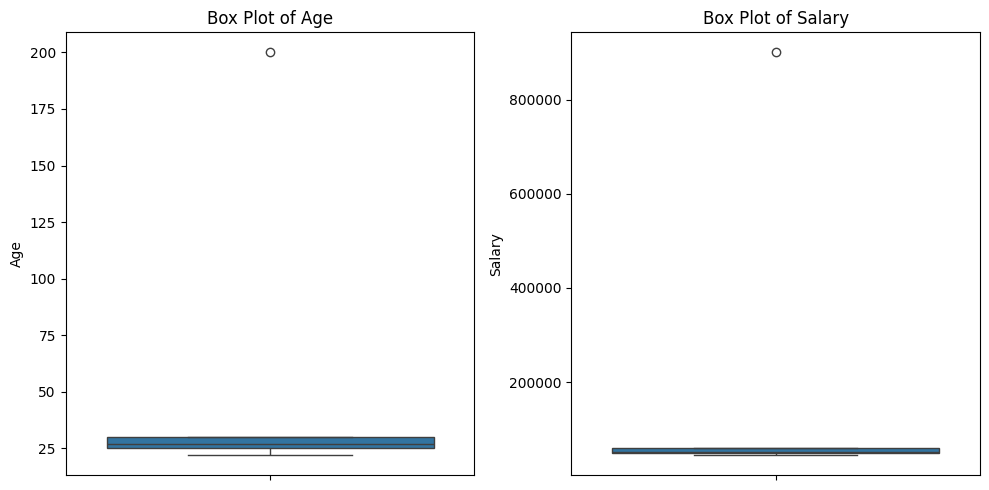

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 22, 27, 200],
    'Salary': [50000, 60000, 45000, 52000, 900000]
}
df = pd.DataFrame(data)

# Create box plots
plt.figure(figsize=(10, 5))

# Box plot for Age
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Age')
plt.title('Box Plot of Age')

# Box plot for Salary
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Salary')
plt.title('Box Plot of Salary')

plt.tight_layout()
plt.show()


### Removing Outliers

In [14]:
df_no_outliers = df[~((df[['Age', 'Salary']] < lower_bound) | (df[['Age', 'Salary']] > upper_bound)).any(axis=1)]

print("\nDataFrame after removing outliers:")
df_no_outliers


DataFrame after removing outliers:


,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,22,45000
3,David,27,52000


### Caping of Outliers

In [15]:
import numpy as np

df_capped = df.copy()
for column in ['Age', 'Salary']:
    df_capped[column] = np.where(
        df_capped[column] < lower_bound[column],
        lower_bound[column],
        np.where(df_capped[column] > upper_bound[column], upper_bound[column], df_capped[column])
    )

print("\nDataFrame after capping outliers:")
df_capped


DataFrame after capping outliers:


,Name,Age,Salary
0,Alice,25.0,50000.0
1,Bob,30.0,60000.0
2,Charlie,22.0,45000.0
3,David,27.0,52000.0
4,Eve,37.5,75000.0


### Replacing outliers with mean

In [16]:
df_replaced = df.copy()
for column in ['Age', 'Salary']:
    mean_value = df_replaced [column].mean()
    df_replaced[column] = np.where(outliers[column], mean_value, df_replaced[column])

print("\nDataFrame after replacing outliers with mean:")
df_replaced



DataFrame after replacing outliers with mean:


,Name,Age,Salary
0,Alice,25.0,50000.0
1,Bob,30.0,60000.0
2,Charlie,22.0,45000.0
3,David,27.0,52000.0
4,Eve,60.8,221400.0


# Handling Duplicates

In [17]:
import pandas as pd

#Sample DataFrame when row is same and duplicated
data = {'Name' : ['Alice', 'Bob', 'Alice', 'David', 'Bob'],
        'Age' : [25, 30, 25, 40, 30],
        'City': ['NY', 'LA', 'NY', 'TX', 'LA']}

df = pd.DataFrame(data)
df

,Name,Age,City
0,Alice,25,NY
1,Bob,30,LA
2,Alice,25,NY
3,David,40,TX
4,Bob,30,LA


In [18]:
#Check for duplicates (return boolean series)
duplicates = df.duplicated()
print(df[duplicates])

    Name  Age City
2  Alice   25   NY
4    Bob   30   LA


In [19]:
#Dropping Duplicates
df_no_duplicates = df.drop_duplicates()
print(df_no_duplicates)

    Name  Age City
0  Alice   25   NY
1    Bob   30   LA
3  David   40   TX


In [20]:
import pandas as pd

#Sample DataFrame when values in row is not same, but one vlaues like name is getting repeated
data = {'Name' : ['Alice', 'Bob', 'Alice', 'David', 'Bob'],
        'Age' : [25, 30, 25, 40, 3],
        'City': ['NY', 'LA', 'NY', 'TX', 'LA']}

df = pd.DataFrame(data)
df

,Name,Age,City
0,Alice,25,NY
1,Bob,30,LA
2,Alice,25,NY
3,David,40,TX
4,Bob,3,LA


In [21]:
#It is to check based one single or multiple columns
# It will delete the 2nd(latest) entry

df_unique = df.drop_duplicates(subset=['Name']) 
print(df_unique)

    Name  Age City
0  Alice   25   NY
1    Bob   30   LA
3  David   40   TX


In [22]:
# To keep 2nd(latest entry)

df_unique = df.drop_duplicates(subset=['Name'], keep = 'last') 
print(df_unique)

    Name  Age City
2  Alice   25   NY
3  David   40   TX
4    Bob    3   LA


In [23]:
#Count of duplicates
duplicate_count = df.duplicated().sum()
print("Number of duplicate row:", duplicate_count)

Number of duplicate row: 1


In [24]:
#Count of duplicates based on selected coulumn
duplicate_count = df.duplicated(subset=['Name']).sum()
print("Duplicate based on 'Name':", duplicate_count)

Duplicate based on 'Name': 2


In [25]:
#Change in origina data
df.drop_duplicates(inplace=True) #inplace will insure proper change in original data

In [26]:
df.drop_duplicates(ignore_index=True) # ingnore_index is used to manage index numbers

,Name,Age,City
0,Alice,25,NY
1,Bob,30,LA
2,David,40,TX
3,Bob,3,LA


# Handling Inconsistent Column Names in Dataset

### Standardizing Column Names

In [27]:
import pandas as pd

#Sample DataFrame when row is same and duplicated
data = {'Name ' : ['Alice', 'Bob', 'David', 'Lex'],
        'age' : [25, 'ha', 40, 31],
        'CITY': ['NY', 'LA', 'TX', 'LE']}

df = pd.DataFrame(data)
print(df)

   Name  age CITY
0  Alice  25   NY
1    Bob  ha   LA
2  David  40   TX
3    Lex  31   LE


In [28]:
# removing space + lowering column name in coulumn name
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df)

    name age city
0  Alice  25   NY
1    Bob  ha   LA
2  David  40   TX
3    Lex  31   LE


In [29]:
#This will amend the inside's data
df['name'] = df['name'].str.strip().str.title()
df['city'] = df['city'].str.strip().str.title()
print(df)

    name age city
0  Alice  25   Ny
1    Bob  ha   La
2  David  40   Tx
3    Lex  31   Le


### Handling Numeric data inconsistency

In [30]:
print(df.dtypes)

name    object
age     object
city    object
dtype: object


In [31]:
#It will only handle numeric data, and if other like text then NaN
df['age'] = pd.to_numeric(df['age'], errors = 'coerce') #Coerce will put Nan
print(df)

    name   age city
0  Alice  25.0   Ny
1    Bob   NaN   La
2  David  40.0   Tx
3    Lex  31.0   Le
